In [1]:
%matplotlib inline

import pickle
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from p_tqdm import p_map
import os
from natsort import natsorted
import numpy as np
from multiprocessing import Pool
import community as cm
from scipy.optimize import curve_fit
from sympy.solvers import solve
from sympy import Symbol

In [2]:
def smooth_diam(graph):
    import networkx as nx
    import numpy as np
    paths =  [l for u in graph for l in nx.single_source_shortest_path_length(graph, u).values()]
    return np.percentile(paths, 90)

In [3]:
true_lens = []
true_clusts = []
true_dims = []
true_diameters = []

for j in tqdm_notebook(range(5)):
    refs = []
    counter = 0
    for f in tqdm_notebook(natsorted(os.listdir('time_graphs/' + str(j) + '/'))):
        counter += 1
        if counter%5 == 0:
            refs.append(nx.read_graphml('time_graphs/' + str(j) + '/' + f))
        
        
    lens = []
    clusts = []
#     p = Pool(12)
#     dims = p.map(get_ds, refs)
#     dims = []
#     spects = p_map(nx.linalg.spectrum.laplacian_spectrum, refs)
#     for s in tqdm_notebook(spects):
#         dims.append(get_ds(s))
#     true_dims.append(dims)
    diameters = p_map(smooth_diam, refs, num_cpus=8)
    true_diameters.append(diameters)
    
#     lens = p_map(nx.average_shortest_path_length, refs)
#     clusts = p_map(nx.average_clustering, refs)

#     true_lens.append(lens)
#     true_clusts.append(clusts)
        
        
len(diameters)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:49<00:00, 10.98s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:31<00:00,  9.42s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:29<00:00, 10.42s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [10:52<00:00, 11.77s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [09:20<00:00,  9.78s/it]


100

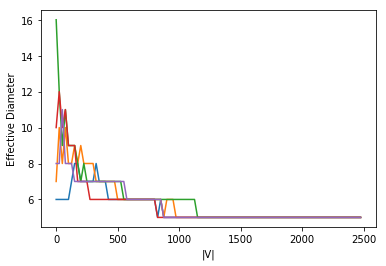

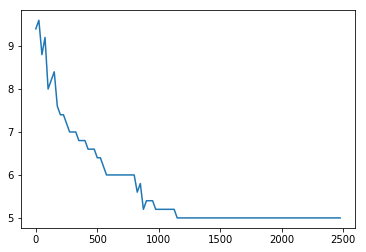

In [15]:
true_diameters = pickle.load(open('time_diams', 'rb'))

for d in true_diameters:
    plt.plot([x*25 for x in range(100)], d)
    
plt.xlabel('|V|')
plt.ylabel('Effective Diameter')
plt.savefig('diameters.png')
plt.show()

avgs = np.array(true_diameters)
avgs = np.mean(avgs, axis=0)

plt.plot([x*25 for x in range(100)], avgs)
plt.show()

pickle.dump(true_diameters, open('time_diams', 'wb'))

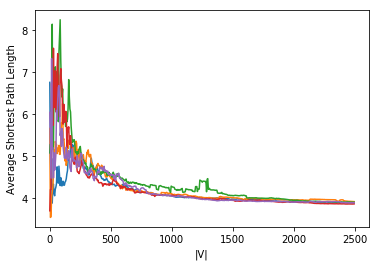

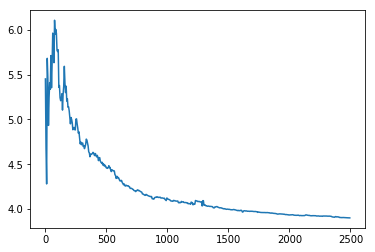

In [16]:
(true_lens, true_clusts) = pickle.load(open('time_stats', 'rb'))

xs = [x * 5 for x in range(500)]

for l in true_lens:
    plt.plot(xs, l)
   
plt.xlabel('|V|')
plt.ylabel('Average Shortest Path Length')
plt.savefig('lens.png')
plt.show()

avgs = np.array(true_lens)
avgs = np.mean(avgs, axis=0)

plt.plot(xs, avgs)
plt.show()

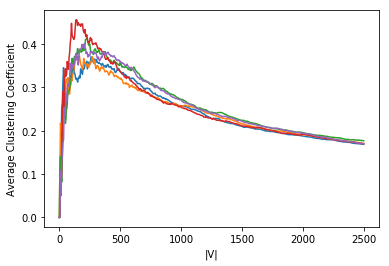

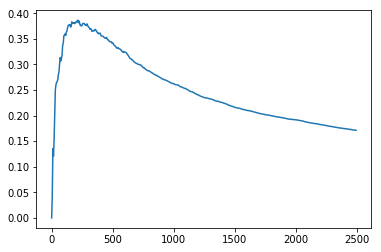

In [17]:
for l in true_clusts:
    plt.plot(xs, l)
    
plt.xlabel('|V|')
plt.ylabel('Average Clustering Coefficient')
plt.savefig('clusts.png')
plt.show()

avgs = np.array(true_clusts)
avgs = np.mean(avgs, axis=0)

plt.plot(xs, avgs)
plt.show()

In [ ]:
# pickle.dump((true_lens, true_clusts), open('time_stats', 'wb'))

In [2]:
refs = [nx.read_graphml('time_graphs/' + str(i) + '/4990.graphml') for i in range(5)]

for r in tqdm_notebook(refs):
    print(r.number_of_nodes(), r.number_of_edges(), nx.average_shortest_path_length(r), nx.average_clustering(r))

3569 28096 3.8953301473701667 0.16850541932019192
3519 26988 3.9232701031240946 0.17065796318918078
3476 26779 3.9103600433807153 0.17675804982318338
3527 27864 3.8691142199201973 0.16982622094326683
3535 27322 3.896700390388299 0.17007183803145445



In [2]:
for _ in tqdm_notebook(range(5)):
    r = nx.erdos_renyi_graph(3500, 0.005)
    print(r.number_of_nodes(), r.number_of_edges(), nx.average_shortest_path_length(r), nx.average_clustering(r))

3500 30705 3.128971052953905 0.0051866812952603295
3500 30296 3.1443759441473076 0.005045378901493841
3500 30567 3.1340092271261177 0.004800154501976329
3500 30429 3.1381994855673048 0.004758341976596405
3500 30727 3.128139305107582 0.005153512874352859



In [7]:
for _ in tqdm_notebook(range(5)):
    r = nx.connected_watts_strogatz_graph(3500, 17, 0.15)
    print(r.number_of_nodes(), r.number_of_edges(), nx.average_shortest_path_length(r), nx.average_clustering(r))

3500 28000 3.9474966725186786 0.43312638042207074
3500 28000 3.9232255746539826 0.42471130264153273
3500 28000 3.945772588086392 0.43199011260988424
3500 28000 3.9443122524803007 0.43185117055532785
3500 28000 3.955349528436696 0.4351737782513323



In [20]:
for r in tqdm_notebook(refs):
    print(smooth_diam(r))

5.0
5.0
5.0
5.0
5.0



In [3]:
j = 4

refs = []
watts = []

counter = 0
for f in tqdm_notebook(natsorted(os.listdir('time_graphs/' + str(j) + '/'))):
    counter += 1
    if counter%5 == 0 and counter > 100:
        refs.append(nx.read_graphml('time_graphs/' + str(j) + '/' + f))
        watts.append(nx.connected_watts_strogatz_graph(refs[-1].number_of_nodes(), 17, 0.15))


diams1 = p_map(smooth_diam, refs, num_cpus=9)
diams2 = p_map(smooth_diam, watts, num_cpus=9)


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [09:03<00:00, 11.25s/it]


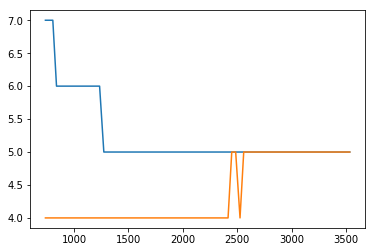

In [4]:
plt.plot([r.number_of_nodes() for r in refs], diams1)
plt.plot([r.number_of_nodes() for r in refs], diams2)

plt.show()

In [25]:
nodes = []
edges = []

for j in tqdm_notebook(range(1)):
    t_nodes = []
    t_edges = []

    for f in tqdm_notebook(natsorted(os.listdir('time_graphs/' + str(j) + '/'))):
        r = nx.read_graphml('time_graphs/' + str(j) + '/' + f)
        t_nodes.append(r.number_of_nodes())
        t_edges.append(r.number_of_edges())
        
    nodes.append(t_nodes)
    edges.append(t_edges)


In [29]:
nodes = []
edges = []

for idx, f in tqdm_notebook(enumerate(natsorted(os.listdir('old_synthetic/')))):
    if i%10 == 0:
        r = nx.read_graphml('old_synthetic/' + f)
        nodes.append(r.number_of_nodes())
        edges.append(r.number_of_edges())

nodes = [nodes]
edges = [edges]

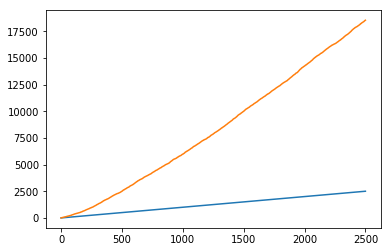

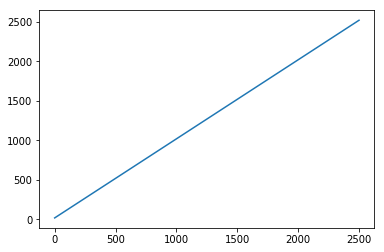

In [30]:
xs = list(range(len(nodes[0])))

for l in nodes:
    plt.plot(xs, l)
    
for l in edges:
    plt.plot(xs, l)
    
plt.show()

avgs = np.array(nodes)
avgs = np.mean(avgs, axis=0)

plt.plot(xs, avgs)
plt.show()

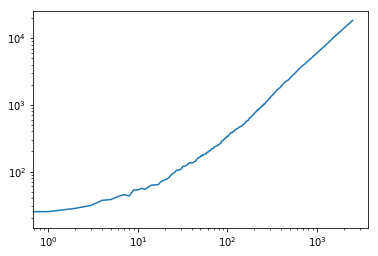

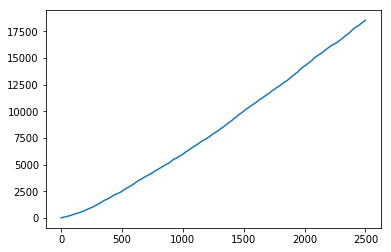

In [31]:
plt.xscale('log')
plt.yscale('log')

for l in edges:
    plt.plot(xs, l)
    
plt.show()

avgs = np.array(edges)
avgs = np.mean(avgs, axis=0)
plt.plot(xs, avgs)
plt.show()

[1.25600442]


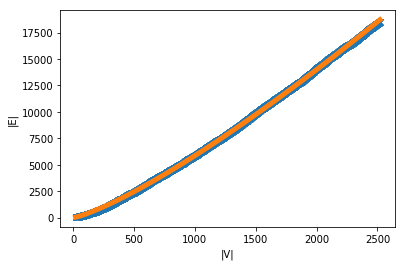

0.9998335679626057


In [32]:
def deg_curve(lb, gamma):
    return lb**gamma

x = nodes[0]
y = edges[0]

popt = curve_fit(deg_curve, x, y)[0]
print(popt)
dk = popt[0]

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('|V|')
plt.ylabel('|E|')
plt.plot(x, y, 'x')
xx = np.linspace(x[0], x[-1], 100)
yy = [deg_curve(x, popt) for x in xx]
plt.plot(xx, yy, lw=5)
plt.savefig('densification.png')
plt.show()

residuals = y- deg_curve(x, popt)
ss_res = np.sum(residuals**2)

ss_tot = np.sum((y-np.mean(y))**2)

r_squared = 1 - (ss_res / ss_tot)

print(r_squared)

In [3]:
for i in range(5):
    r = nx.read_graphml('time_graphs/' + str(i) + '/4990.graphml')
    coms = cm.best_partition(r)
    print(cm.modularity(coms, r), len(coms), r.number_of_nodes(), r.number_of_edges())

0.7371400391162128 3569 3569 28096
0.7357387815968315 3519 3519 26988
0.7481452493046369 3476 3476 26779
0.736975030281201 3527 3527 27864
0.7417795849149742 3535 3535 27322


In [10]:
for i in range(5):
    r = nx.erdos_renyi_graph(3500, 0.04)
    coms = cm.best_partition(r)
    print(cm.modularity(coms, r), len(coms), r.number_of_nodes(), r.number_of_edges())

0.07369661570963444 3500 3500 244854
0.07125136982399863 3500 3500 245360
0.07072112707085107 3500 3500 245303
0.07170384378761033 3500 3500 244456
0.06996622083236542 3500 3500 244330


In [9]:
for i in range(5):
    r = nx.connected_watts_strogatz_graph(3500, 17, 0.15)
    coms = cm.best_partition(r)
    print(cm.modularity(coms, r), len(coms), r.number_of_nodes(), r.number_of_edges())

0.7910096530612246 3500 3500 28000
0.7914522991071429 3500 3500 28000
0.7910078609693877 3500 3500 28000
0.7917965446428571 3500 3500 28000
0.7926692480867347 3500 3500 28000


In [12]:
r = nx.read_edgelist('real_graphs/email.txt', data=False)
coms = cm.best_partition(r)
print(cm.modularity(coms, r), len(coms), r.number_of_nodes(), r.number_of_edges())

0.5734601725241405 1133 1133 5452


In [14]:
r = nx.read_graphml('0.graphml')
coms = cm.best_partition(r)
print(cm.modularity(coms, r), len(coms), r.number_of_nodes(), r.number_of_edges())

0.6529854561465889 3015 3015 5539
